In [30]:
%matplotlib inline
from modsim import *
import pandas

init = State(Sh=1000, Ih=0, Rh=0, Sm=990, Im=10)

h_birth_rate = 0.00213
h_death_rate = 0.00213

m_birth_rate = 0.03
m_death_rate = 0.03

a = 0.15
b = 0.07
c = 0.2
v = 0.67 * (init.Sh + init.Ih + init.Rh) 
# Vaccinating two thirds of the population because
# vaccine is currently about 67% effective


def make_system(t0=0, t_end=100):
    init = State(Sh=1000, Ih=0, Rh=0, Sm=990, Im=10)
    
    return System(init=init, t0=t0, t_end=t_end)

def add_vaccine(system, doses):
    system.init.Sh -= doses
    system.init.Rh += doses

def update(state, system):
    s1, i1, r1, s2, i2 = state
    
    h_pop = s1 + i1 + r1
    m_pop = s2 + i2
    
    born = h_birth_rate * h_pop
    m_born = m_birth_rate * m_pop
    m_deaths = m_death_rate * m_pop
    h_deaths = h_death_rate * h_pop
    
    s1_deaths = (s1 / (s1 + i1 + r1)) * h_deaths
    i1_deaths = (i1 / (s1 + i1 + r1)) * h_deaths
    r1_deaths = (r1 / (s1 + i1 + r1)) * h_deaths
    
    s2_deaths = (s2 / (s2 + i2)) * m_deaths
    i2_deaths = (i2 /(s2 + i2)) * m_deaths
    # Deaths from each group is proportional to percentage
    # of total population that group comprises
    
    infected_h = (a*s1*i2) / h_pop
    
    recovered = b*i1
    
    infected_m = (c*i1*s2) / m_pop
    
    if s1 > (infected_h  + born - s1_deaths):
        s1 += -infected_h  + born - s1_deaths
    else:
        s1 = s1
    
    if (i1 + infected_h) > (recovered - i1_deaths):
        i1 += infected_h - recovered - i1_deaths
    else:
        i1 = i1
        
    if (r1 + recovered) > r1_deaths:
        r1 += recovered - r1_deaths
    else:
        r1 = r1
        
    if (s2 + m_born) > infected_m - s2_deaths:
        s2 += m_born - infected_m - s2_deaths
    else:
        s2 = s2
    
    if (i2 + infected_m) > i2_deaths:
        i2 += infected_m - i2_deaths
    else:
        i2 = i2
   # If/else statements keep population from going negative
    
    return State(Sh=s1, Ih=i1, Rh=r1, Sm=s2, Im=i2)


def run_simulation(system, update_func):
    Sh = TimeSeries()
    Ih = TimeSeries()
    Rh = TimeSeries()
    
    Sm = TimeSeries()
    Im = TimeSeries()
    
    state = system. init
    t0 = system.t0
    
    Sh[t0], Ih[t0], Rh[t0], Sm[t0], Im[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        
        Sh[t+1], Ih[t+1], Rh[t+1], Sm[t+1], Im[t+1] = state
        
    system.Sh = Sh
    system.Ih = Ih
    system.Rh = Rh
    system.Sm = Sm
    system.Im = Im
    
def plot_results1(S, I, R):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Population')
    
def plot_results2(S, I):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    decorate(xlabel='Time (days)',
             ylabel='Population')

0       0.000000
1       1.500000
2       2.844622
3       4.091059
4       5.286139
5       6.468957
6       7.672921
7       8.927374
8      10.258857
9      11.692122
10     13.250936
11     14.958718
12     16.839056
13     18.916109
14     21.214922
15     23.761664
16     26.583785
17     29.710090
18     33.170742
19     36.997162
20     41.221829
21     45.877964
22     50.999071
23     56.618326
24     62.767799
25     69.477481
26     76.774117
27     84.679836
28     93.210593
29    102.374437
         ...    
32    133.587217
33    145.140448
34    157.183705
35    169.640420
36    182.415961
37    195.398012
38    208.457830
39    221.452457
40    234.227878
41    246.623066
42    258.474732
43    269.622548
44    279.914530
45    289.212233
46    297.395434
47    304.365973
48    310.050552
49    314.402316
50    317.401214
51    319.053182
52    319.388299
53    318.458141
54    316.332545
55    313.096055
56    308.844263
57    303.680246
58    297.711254
59    291.0457

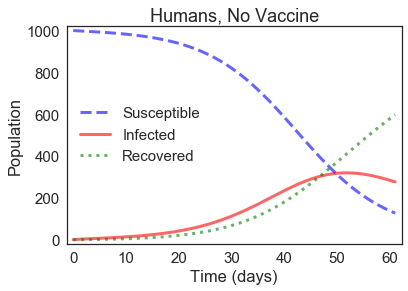

In [29]:
system = make_system()

run_simulation(system, update)

plot_results1(system.Sh, system.Ih, system.Rh)
decorate(title='Humans, No Vaccine')
#print(system.Ih)


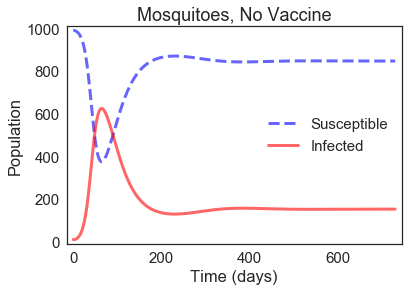

In [25]:
system = make_system()

run_simulation(system, update)

plot_results2(system.Sm, system.Im)
decorate(title='Mosquitoes, No Vaccine')
#print(system.Im + system.Sm)

0       0.000000
1       0.495000
2       0.940802
3       1.346215
4       1.718806
5       2.065087
6       2.390677
7       2.700441
8       2.998605
9       3.288858
10      3.574436
11      3.858192
12      4.142664
13      4.430123
14      4.722619
15      5.022020
16      5.330047
17      5.648297
18      5.978270
19      6.321391
20      6.679024
21      7.052485
22      7.443061
23      7.852014
24      8.280591
25      8.730035
26      9.201582
27      9.696474
28     10.215959
29     10.761289
         ...    
72     68.446876
73     70.195310
74     71.898903
75     73.550844
76     75.144418
77     76.673074
78     78.130484
79     79.510613
80     80.807780
81     82.016716
82     83.132622
83     84.151217
84     85.068778
85     85.882181
86     86.588925
87     87.187155
88     87.675670
89     88.053928
90     88.322040
91     88.480755
92     88.531437
93     88.476043
94     88.317080
95     88.057569
96     87.701002
97     87.251287
98     86.712707
99     86.0898

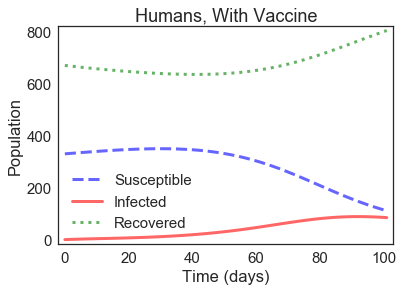

In [31]:
system = make_system()
add_vaccine(system, v)

run_simulation(system, update)

plot_results1(system.Sh, system.Ih, system.Rh)
decorate(title='Humans, With Vaccine')
#print(system.Ih)

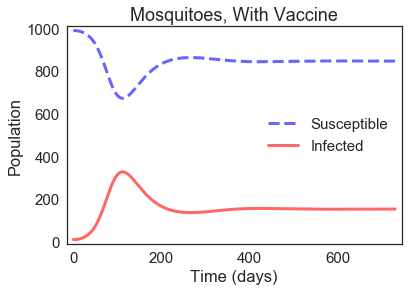

In [27]:
plot_results2(system.Sm, system.Im)
decorate(title='Mosquitoes, With Vaccine')